In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 임포트 완료!")

C:\miniconda3\envs\Hotel_Project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ 라이브러리 임포트 완료!


In [2]:
# 전처리된 데이터 로드
df = pd.read_csv('../data/daily_bookings.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"📊 데이터 기간: {df['date'].min()} ~ {df['date'].max()}")
print(f"📊 총 {len(df)}일 데이터")
print(f"📊 평균 일일 예약: {df['bookings'].mean():.1f}건\n")

df.head()

📊 데이터 기간: 2015-07-01 00:00:00 ~ 2017-08-31 00:00:00
📊 총 793일 데이터
📊 평균 일일 예약: 94.8건



,date,bookings
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37


In [3]:
# Prophet은 'ds'(날짜), 'y'(값) 컬럼명 필요
df_prophet = df.rename(columns={'date': 'ds', 'bookings': 'y'})

print("✅ Prophet 형식 변환 완료!")
df_prophet.head()

✅ Prophet 형식 변환 완료!


,ds,y
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37


In [4]:
# Prophet 모델 생성
model = Prophet(
    yearly_seasonality=True,   # 연간 계절성
    weekly_seasonality=True,   # 주간 계절성
    daily_seasonality=False,   # 일간 계절성 (불필요)
    seasonality_mode='multiplicative'  # 계절성 모드
)

print("🔄 모델 학습 중... (30초~1분 소요)")
model.fit(df_prophet)
print("✅ 모델 학습 완료!")

21:14:40 - cmdstanpy - INFO - Chain [1] start processing


🔄 모델 학습 중... (30초~1분 소요)


21:14:41 - cmdstanpy - INFO - Chain [1] done processing


✅ 모델 학습 완료!


In [5]:
# 향후 30일 예측
future = model.make_future_dataframe(periods=30, freq='D')

print(f"📅 예측 기간: {len(future)}일")
print(f"   - 과거 데이터: {len(df_prophet)}일")
print(f"   - 미래 예측: 30일")

future.tail()

📅 예측 기간: 823일
   - 과거 데이터: 793일
   - 미래 예측: 30일


,ds
818,2017-09-26
819,2017-09-27
820,2017-09-28
821,2017-09-29
822,2017-09-30


In [6]:
# 예측 실행
forecast = model.predict(future)

print("✅ 예측 완료!")
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

✅ 예측 완료!


,ds,yhat,yhat_lower,yhat_upper
793,2017-09-01,117.707931,82.652976,151.094106
794,2017-09-02,111.934219,74.254304,146.710860
795,2017-09-03,101.752738,65.566587,139.811656
796,2017-09-04,125.675711,89.239617,160.200223
797,2017-09-05,102.310582,66.062352,137.891462
798,2017-09-06,110.712102,76.187576,145.212621
799,2017-09-07,123.117425,86.787609,159.271062
800,2017-09-08,127.204487,90.211363,161.874007
801,2017-09-09,121.197041,85.374362,156.288697
802,2017-09-10,110.646788,75.001258,146.458601


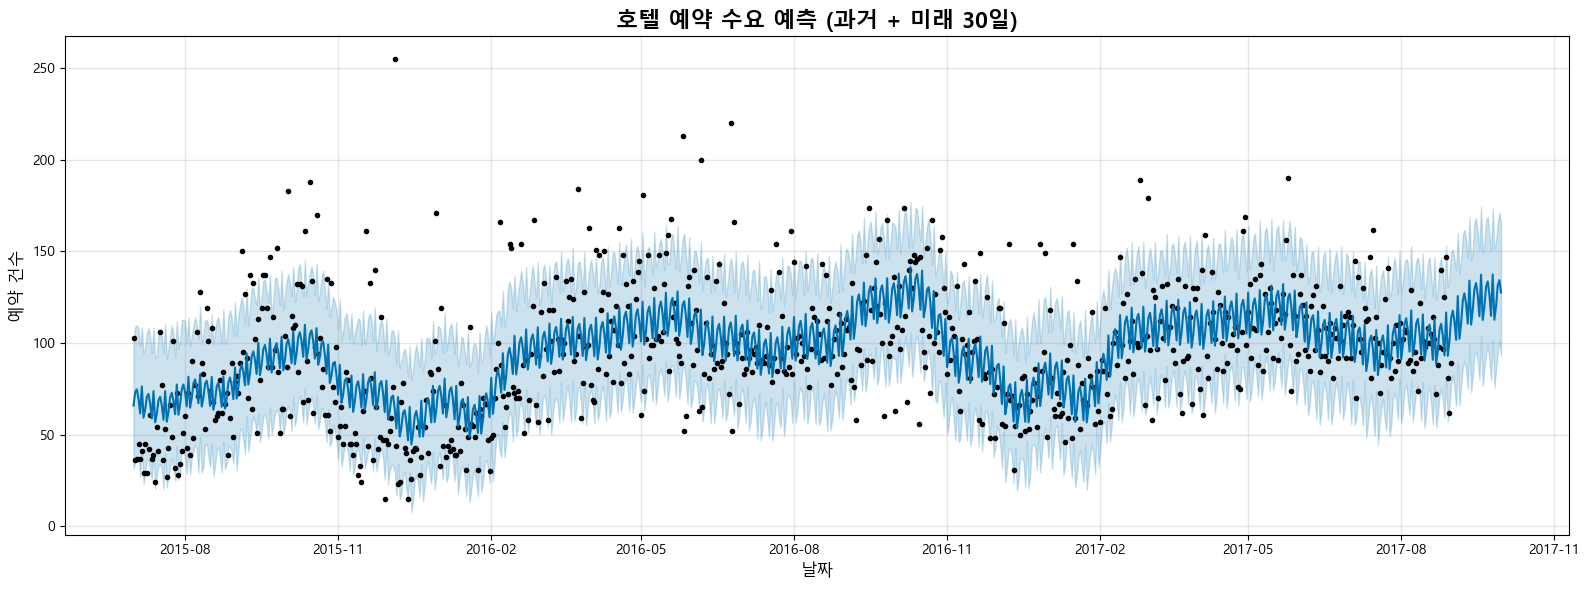

In [7]:
# 전체 예측 그래프
fig1 = model.plot(forecast, figsize=(16, 6))
plt.title('호텔 예약 수요 예측 (과거 + 미래 30일)', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('예약 건수', fontsize=12)
plt.tight_layout()
plt.show()

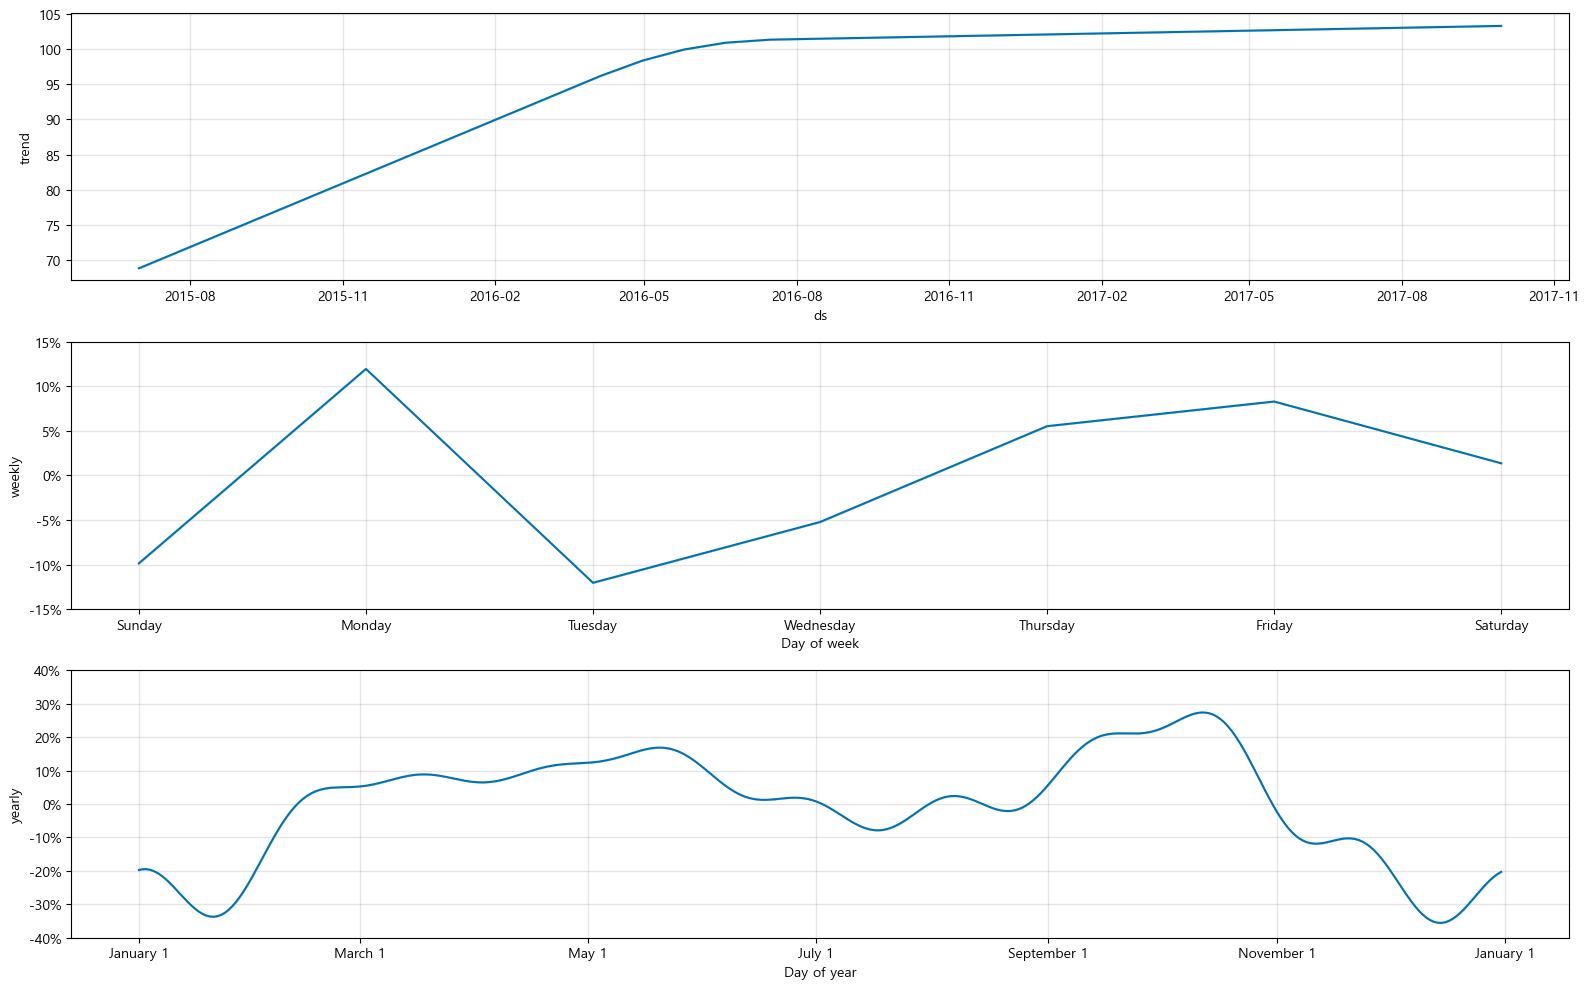

In [8]:
# 추세 및 계절성 분석
fig2 = model.plot_components(forecast, figsize=(16, 10))
plt.tight_layout()
plt.show()

In [9]:
# 실제값 vs 예측값 비교
merged = df_prophet.merge(
    forecast[['ds', 'yhat']], 
    on='ds', 
    how='left'
)

# 평가 지표
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
mape = np.mean(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100

print("📊 모델 성능 평가:")
print(f"   MAE (평균 절대 오차): {mae:.2f}건")
print(f"   RMSE (제곱근 평균 제곱 오차): {rmse:.2f}건")
print(f"   MAPE (평균 절대 백분율 오차): {mape:.2f}%")

📊 모델 성능 평가:
   MAE (평균 절대 오차): 20.77건
   RMSE (제곱근 평균 제곱 오차): 27.59건
   MAPE (평균 절대 백분율 오차): 26.00%


In [10]:
# 미래 30일 예측만 추출
forecast_future = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)
forecast_future.columns = ['date', 'prediction', 'lower_bound', 'upper_bound']

# 정수로 변환 (예약 건수는 정수)
forecast_future['prediction'] = forecast_future['prediction'].round().astype(int)
forecast_future['lower_bound'] = forecast_future['lower_bound'].round().astype(int)
forecast_future['upper_bound'] = forecast_future['upper_bound'].round().astype(int)

# 저장
forecast_future.to_csv('../data/forecast_results.csv', index=False)

print("✅ 예측 결과 저장 완료: forecast_results.csv")
forecast_future

✅ 예측 결과 저장 완료: forecast_results.csv


,date,prediction,lower_bound,upper_bound
793,2017-09-01,118,83,151
794,2017-09-02,112,74,147
795,2017-09-03,102,66,140
796,2017-09-04,126,89,160
797,2017-09-05,102,66,138
798,2017-09-06,111,76,145
799,2017-09-07,123,87,159
800,2017-09-08,127,90,162
801,2017-09-09,121,85,156
802,2017-09-10,111,75,146


In [11]:
# 예측 요약
print("📈 향후 30일 예약 수요 예측 요약:\n")
print(f"   평균 예상 예약: {forecast_future['prediction'].mean():.0f}건")
print(f"   최대 예상 예약: {forecast_future['prediction'].max():.0f}건 ({forecast_future.loc[forecast_future['prediction'].idxmax(), 'date'].strftime('%Y-%m-%d')})")
print(f"   최소 예상 예약: {forecast_future['prediction'].min():.0f}건 ({forecast_future.loc[forecast_future['prediction'].idxmin(), 'date'].strftime('%Y-%m-%d')})")

📈 향후 30일 예약 수요 예측 요약:

   평균 예상 예약: 122건
   최대 예상 예약: 137건 (2017-09-18)
   최소 예상 예약: 102건 (2017-09-03)
